# Project Description

**Commercial banks receives so many applications for credit card request. Going through each request manually can be very time consuming, also prone to human errors. However, if we can use the historical data to build a model which can shortlist the candidates for approval that can be great.**

In this project, we will build an automatic credit card approval predictor using machine learning techniques, just like real banks do. ***This model will be useful because predicting a good client is critical for the success of a bank as we have seen how bad Loans or NPA(Non-performing Assets) leads to downfall of a bank and sometimes even leads to bankruptcy of Banks.***

Moreover, **this approach combines the data driven approach with human experience and domain knowledge so that the person taking decision is better equipped**.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
credit_card_without_label = pd.read_csv('Credit_card.csv') # reading url dataset
print("Shape of credit_card_without_label is {}".format(credit_card_without_label.shape))
credit_card_without_label.head()
credit_card=credit_card_without_label #creating a copy of original dataset

Shape of credit_card_without_label is (1548, 18)


In [3]:
credit_card.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


### Payment history, the number and type of credit accounts, available credit and the length of credit history are important factors frequently used to calculate credit scores. If I had these data , it would be better to train the ML models and predict in a better way.

In [4]:
credit_card_with_label = pd.read_csv('Credit_card_label.csv') # reading url dataset
print("Shape of credit_card_with_label is {}".format(credit_card_with_label.shape))
credit_card_with_label.head()

Shape of credit_card_with_label is (1548, 2)


,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [5]:
credit_card.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2


A lot of columns have inconsistent values like Type of Occupation has NaN. Columns like Employed_days and Birthday_Count have negative values in them but the numbers are counted backwards.

**Initial Hypothesis** are:
1.   **Gender is important in credit card approval**
2.   **Random Forest Classifier** would **out-perform** other classification Models



### Examining few observations and features to Know the Data

In [6]:
credit_card.info() # get thourough information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

Email_Id should be of object type, but its usage on predicting credit card approval is limited, so we will not be using this column


In [7]:
credit_card.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000


In [8]:
credit_card.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

Out of 1548 entries, 488 entries are missing in case of Type_occupation column. It is an important attribute for credit_card analysis as 31% of records are missing.

In [9]:
print("Duplicate records present in dataset= {}\n".format(credit_card.duplicated().sum()))
# check for the variation in each attribute
credit_card.nunique()

Duplicate records present in dataset= 0



Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
dtype: int64

In [10]:
credit_card["Type_Occupation"].unique()

array([nan, 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

# **Preprocessing** : Handling the missing values and outliers

In [11]:
# replacing nan value in Type_Occupation with 'Missing'
credit_card["Type_Occupation"].fillna("Missing",inplace=True)

In [12]:
credit_card["Type_Occupation"].unique()

array(['Missing', 'Core staff', 'Cooking staff', 'Laborers',
       'Sales staff', 'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

**Creating histplots for continous variables to check their distribution and skewness.**




<Axes: xlabel='Employed_days', ylabel='Count'>

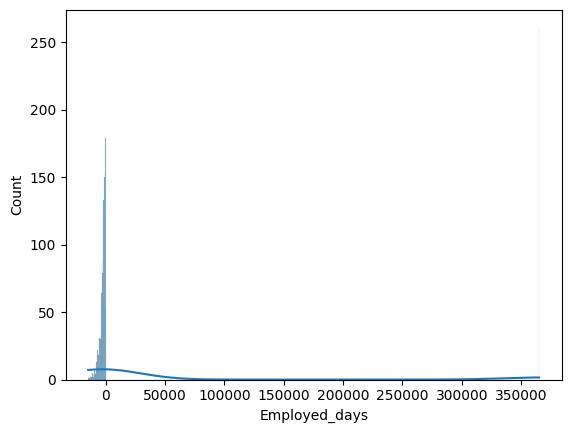

In [13]:
sns.histplot(data = credit_card['Employed_days'], kde = True)
# we need to standardise this attribute before training the dataset

<Axes: xlabel='Family_Members', ylabel='Count'>

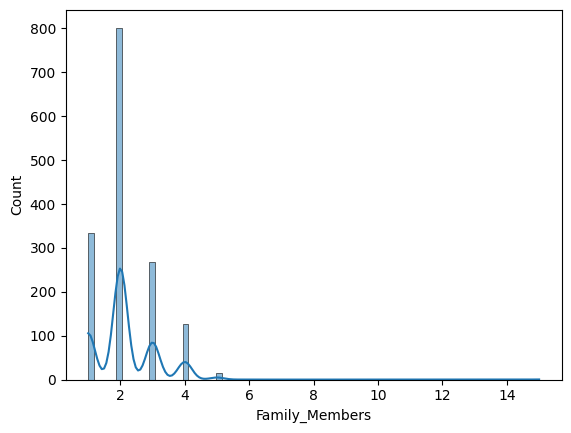

In [14]:
# creating histograms for all continous variables
sns.histplot(data = credit_card['Family_Members'], kde = True)

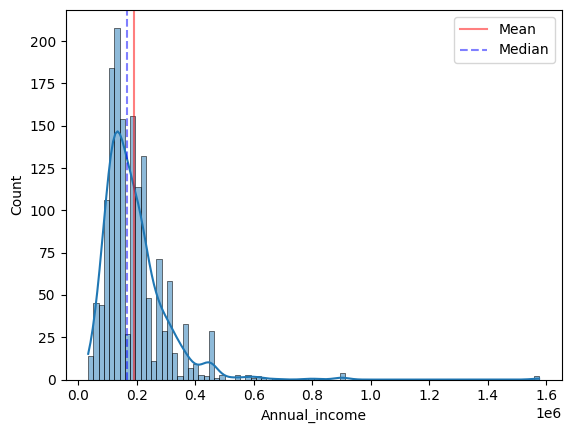

In [15]:
sns.histplot(data = credit_card['Annual_income'], kde = True)
plt.axvline(x=credit_card.Annual_income.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=credit_card.Annual_income.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()

Annual Income is near Rightly skewed


<Axes: >

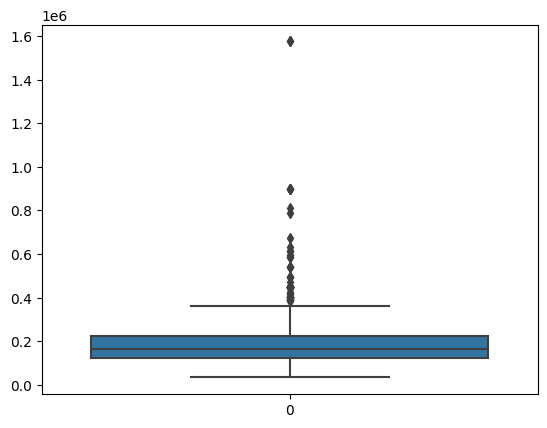

In [16]:
sns.boxplot(credit_card["Annual_income"]) # checking for outliers

In [17]:
# Filling missing values of Annnual income with median as outliers are there
credit_card["Annual_income"].fillna(credit_card["Annual_income"].median(),inplace=True)

In [18]:
# Need to deal with outliers using capping, give reason for its usage
Q1 = np.percentile(credit_card['Annual_income'], 25, method = 'midpoint')
Q2 = np.percentile(credit_card['Annual_income'], 50, method = 'midpoint')
Q3 = np.percentile(credit_card['Annual_income'], 75, method = 'midpoint')

In [19]:
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)
outlier =[]
for x in credit_card['Annual_income']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print('There are {} outliers in the dataset namely {}'.format(len(outlier), outlier))

Interquartile range is 103500.0
low_limit is -33750.0
up_limit is 380250.0
There are 73 outliers in the dataset namely [450000.0, 450000.0, 450000.0, 472500.0, 540000.0, 540000.0, 450000.0, 391500.0, 391500.0, 391500.0, 675000.0, 585000.0, 585000.0, 450000.0, 450000.0, 450000.0, 450000.0, 450000.0, 450000.0, 445500.0, 1575000.0, 1575000.0, 900000.0, 450000.0, 450000.0, 423000.0, 450000.0, 540000.0, 450000.0, 495000.0, 612000.0, 427500.0, 612000.0, 450000.0, 787500.0, 450000.0, 594000.0, 585000.0, 495000.0, 387000.0, 450000.0, 900000.0, 382500.0, 450000.0, 900000.0, 405000.0, 405000.0, 445500.0, 450000.0, 450000.0, 450000.0, 450000.0, 405000.0, 900000.0, 630000.0, 450000.0, 418500.0, 450000.0, 405000.0, 405000.0, 405000.0, 495000.0, 450000.0, 387000.0, 810000.0, 391500.0, 405000.0, 450000.0, 405000.0, 450000.0, 450000.0, 405000.0, 450000.0]


In [20]:
# Using Capping technique to remove outliers so that variation in the data exists and our model may perform better
credit_card['Annual_income']=credit_card['Annual_income'].clip(lower=low_lim, upper=up_lim)

In [21]:
# filling missing values in  gender
credit_card['GENDER'].value_counts()

F    973
M    568
Name: GENDER, dtype: int64

In [22]:
# clearly, more values are female, so replacing missing values of GENDER column with 'F' value
credit_card['GENDER'].fillna("F",inplace=True)

<Axes: >

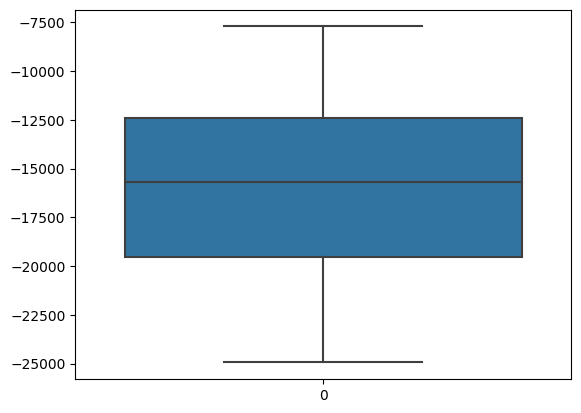

In [23]:
# Filling misssing values of Birthday_count
# sns.histplot(data = credit_card['Birthday_count'], kde = True)
sns.boxplot(data = credit_card['Birthday_count'])
# Almost normally distributed with no outliers

In [24]:
# Filling missing values with mean
credit_card['Birthday_count'].fillna(credit_card['Birthday_count'].mean(),inplace=True)

In [25]:
# Re-checking if all missing values are handled
credit_card.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
dtype: int64

In [26]:
credit_card.head()
# Now data is cleaned so storing cleaned data for SQL usage at last
# merging the cleaned dataset with labels
cleaned_credit_card= credit_card
cleaned_credit_card= cleaned_credit_card.merge(credit_card_with_label)

In [27]:
# calculate the correlation matrix on the numeric columns
corr = cleaned_credit_card.corr()

corr

<ipython-input-27-878e507f3e3d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = cleaned_credit_card.corr()


,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
Ind_ID,1.000000,0.032535,0.000618,0.022778,-0.055396,NaN,0.085794,0.008403,-0.037923,0.016950,0.016796
CHILDREN,0.032535,1.000000,0.062105,0.278041,-0.219095,NaN,0.035014,-0.004908,0.025776,0.890248,-0.021646
Annual_income,0.000618,0.062105,1.000000,0.108217,-0.194129,NaN,-0.065101,0.007105,0.139242,0.049916,0.019082
Birthday_count,0.022778,0.278041,0.108217,1.000000,-0.614352,NaN,0.172951,-0.028952,0.166626,0.264992,-0.044831
Employed_days,-0.055396,-0.219095,-0.194129,-0.614352,1.000000,NaN,-0.231184,-0.003403,-0.118268,-0.238705,0.031408
Mobile_phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Phone,0.085794,0.035014,-0.065101,0.172951,-0.231184,NaN,1.000000,0.352439,-0.009594,0.072228,-0.007046
Phone,0.008403,-0.004908,0.007105,-0.028952,-0.003403,NaN,0.352439,1.000000,0.018105,0.005372,-0.000664
EMAIL_ID,-0.037923,0.025776,0.139242,0.166626,-0.118268,NaN,-0.009594,0.018105,1.000000,0.035098,0.012921
Family_Members,0.016950,0.890248,0.049916,0.264992,-0.238705,NaN,0.072228,0.005372,0.035098,1.000000,-0.030709


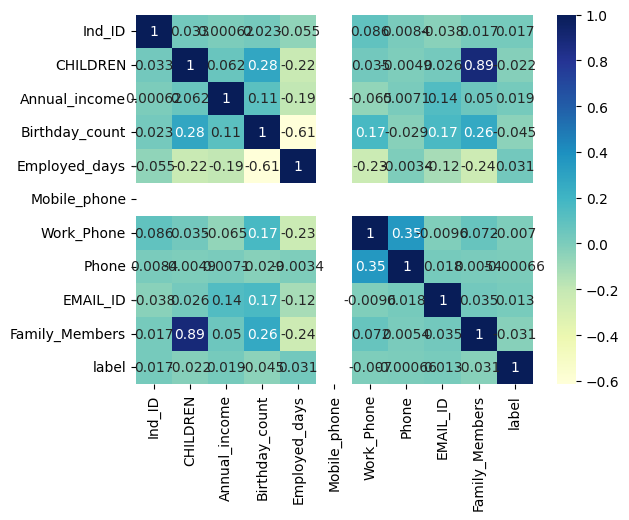

In [28]:
# Further Exploration

# cleaned_credit_card.corr()
# plotting correlation heatmap
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()


# bar plots
# plt.figure(figsize = (9, 7))
# splot = sns.barplot(x = "GENDER", y = cleaned_credit_card.label., data=cleaned_credit_card)
# for g in splot.patches:
#     splot.annotate(format(g.get_height(), '.1f'),
#                    (g.get_x() + g.get_width() / 2., g.get_height()),
#                    ha = 'center', va = 'center',
#                    xytext = (0, 9),
#                    textcoords = 'offset points')
# plt.xlabel("GENDER", size = 14)
# plt.ylabel("label", size = 14)
# plt.show()

### No attribute is strongly correlated with the target variable.
### Moreover, a strong correlation exists only between Family_members and Children.

In [29]:
# Now dropping columns which are of no use for predicting credit card approval
# These columns are Mobile_phone	Work_Phone	Phone	EMAIL_ID
credit_card.drop(columns=["Mobile_phone"	,"Work_Phone"	,"Phone"	,"EMAIL_ID"],inplace=True)

In [30]:
# Lets encode categorical columns
credit_card=pd.get_dummies(credit_card,columns=["GENDER",	"Car_Owner",	"Propert_Owner","Type_Income",	"Marital_status",	"Housing_type",'Type_Occupation'])

In [31]:
# Education is ordinal column
credit_card['EDUCATION'].value_counts()

Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: EDUCATION, dtype: int64

*Getting some idea about Ordinality of Education column using Annual_salary*

In [32]:
credit_card['Annual_income'][credit_card['EDUCATION']=='Incomplete higher'].median()

175500.0

In [33]:
credit_card['Annual_income'][credit_card['EDUCATION']=='Secondary / secondary special'].median()

157500.0

In [34]:
edu_order={'Lower secondary':1,'Secondary / secondary special':2,'Incomplete higher':3,'Academic degree':4,'Higher education':5}
credit_card['EDUCATION_ORDINAL']=credit_card['EDUCATION'].map(edu_order)

In [35]:
# drop education column as we have created ordered based another column for educaion
credit_card.drop(columns=["EDUCATION"],inplace=True)

In [36]:
credit_card.head()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Family_Members,GENDER_F,GENDER_M,Car_Owner_N,Car_Owner_Y,...,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Missing,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff,EDUCATION_ORDINAL
0,5008827,0,180000.0,-18772.000000,365243,2,0,1,0,1,...,0,0,1,0,0,0,0,0,0,5
1,5009744,0,315000.0,-13557.000000,-586,2,1,0,0,1,...,0,0,1,0,0,0,0,0,0,5
2,5009746,0,315000.0,-16040.342071,-586,2,1,0,0,1,...,0,0,1,0,0,0,0,0,0,5
3,5009749,0,166500.0,-13557.000000,-586,2,1,0,0,1,...,0,0,1,0,0,0,0,0,0,5
4,5009752,0,315000.0,-13557.000000,-586,2,1,0,0,1,...,0,0,1,0,0,0,0,0,0,5


<!-- Preprocessing and cleaning is complete -->
<!-- Now train-test splitting the dataset for usage -->
Splitting the dataset into the Training set and Test set

In [37]:
credit_card.head()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Family_Members,GENDER_F,GENDER_M,Car_Owner_N,Car_Owner_Y,...,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Missing,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff,EDUCATION_ORDINAL
0,5008827,0,180000.0,-18772.000000,365243,2,0,1,0,1,...,0,0,1,0,0,0,0,0,0,5
1,5009744,0,315000.0,-13557.000000,-586,2,1,0,0,1,...,0,0,1,0,0,0,0,0,0,5
2,5009746,0,315000.0,-16040.342071,-586,2,1,0,0,1,...,0,0,1,0,0,0,0,0,0,5
3,5009749,0,166500.0,-13557.000000,-586,2,1,0,0,1,...,0,0,1,0,0,0,0,0,0,5
4,5009752,0,315000.0,-13557.000000,-586,2,1,0,0,1,...,0,0,1,0,0,0,0,0,0,5


In [38]:
# merging the processed dataset with labels to get correct corresponding labels with their attributes
# before train-test splitting
credit_card= credit_card.merge(credit_card_with_label)

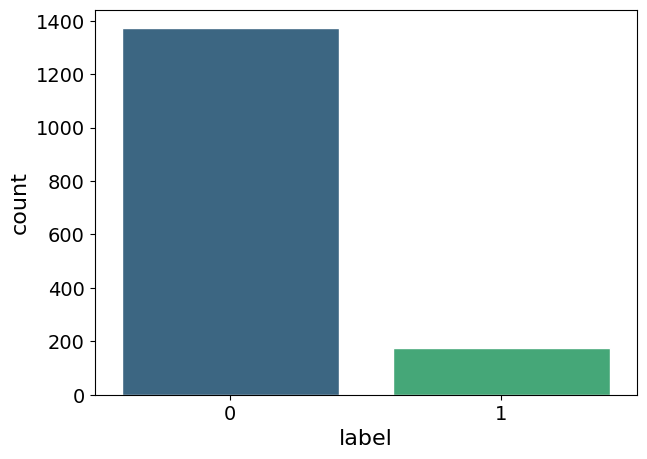

In [39]:
# Checking for the imbalance in the dataset
# credit_card.label.value_counts()
fig, ax = plt.subplots(1, 1, figsize=(7,5), sharex=True)
sns.countplot(data=credit_card, x='label',edgecolor="white",palette="viridis",order=credit_card.label.value_counts().index)
total = credit_card.label.value_counts().sum()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('label', fontsize=16)
plt.ylabel('count', fontsize=16)

plt.show()

Here, the **dataset** is **highly imbalanced** regarding the target variable ,so performance metrics like accuracy, precision, Recall will not be able to guide us on ML Model's efficiency.
Here we will **use AUC/ROC curve as a performance metric to compare different ML models.**

In [40]:
y = credit_card.iloc[:, -1].values


In [41]:
# Now Ind_ID column is of no use for ML model prediction
credit_card.drop(columns=["Ind_ID",'label'],inplace=True)


In [42]:
X = credit_card.iloc[:, :].values  # testing without using one hot encoding

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
# test_size 0.2 means 20 percent of data will be in test
# random_State = 1 means, we will get the same information everytime as we are randomly splitting the data.
# random_state means we are just fixing the seet here.


**Feature scaling**
#### Standardization
$X = \frac{Xi - {X}_{mean}} {SD}$

using standardization as most of our independent variables follows normal distribution . Further using Standardization helps to preserve the relationship between data points

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

In [44]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# fit will calculate mean and sd
# transform will calculate standardized value
X_train[:,1:3] = sc.fit_transform(X_train[:, 1:3])

# Here we will use only transform method as test data set is like new dataset.
# Hence, we have to use same scalar that was used for training datset because ML model will be trained with particular scaler
# using fit method will add new scalar
X_test[:, 1:3] = sc.transform(X_test[:, 1:3])

#  Only Birthday_count is not normally distributed among all continous variables, so normalizing it using MIN-MAX scaler
$X = \frac{{X}_{i} - min(X)} {max(X) - min(X)}$


In [45]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

# fit will calculate mean and sd
# transform will calculate standardized value
X_train[:, 3:4] = sc.fit_transform(X_train[:, 3:4])

# Here we will use only transform method as test data set is like new dataset.
# Hence, we have to use same scalar that was used for training datset because ML model will be trained with particular scaler
# using fit method will add new scalar
X_test[:, 3:4] = sc.transform(X_test[:, 3:4])

Now using ML models to predict

# Here we will use AUC value to measure performance of ML Model.
The area under this ROC curve, AUC, equates to the model’s ability to predict classes correctly, as a large amount of area would show that the model can achieve a high true positive rate with a correspondingly low false positive rate.

https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/

# **Decision Tree Classifier**

In [46]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importing train_test_split function
from sklearn import metrics #Importing scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [47]:
# Now trying hyper-parameter tuning to check results
tree_classification = DecisionTreeClassifier(criterion="entropy",random_state=10)

# Train Decision Tree Classifer
tree_classification = tree_classification.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = tree_classification.predict(X_test)
print(f"Decision tree training set accuracy: {format(tree_classification.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(tree_classification.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 0.9927 
Decision tree testing set accuracy: 0.8935 


In [48]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       274
           1       0.53      0.69      0.60        36

    accuracy                           0.89       310
   macro avg       0.75      0.81      0.77       310
weighted avg       0.91      0.89      0.90       310



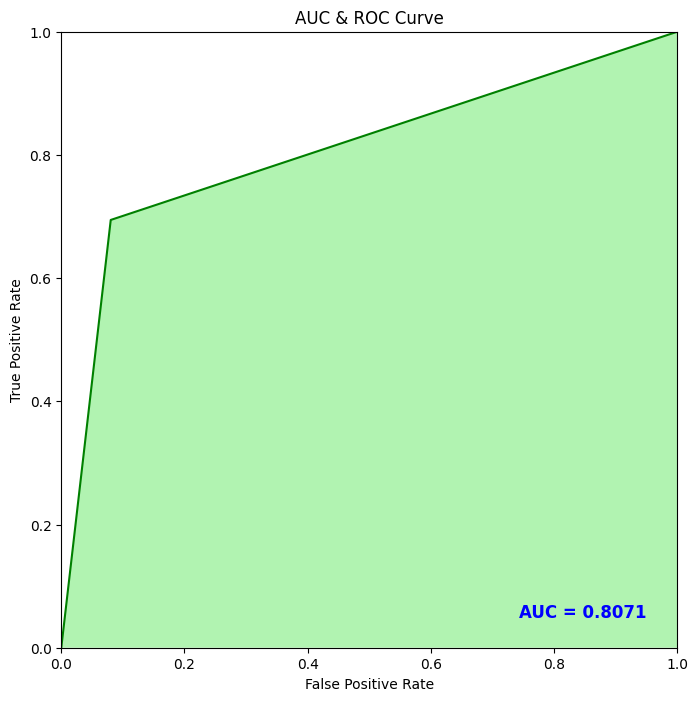

In [49]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test,y_pred)
auc
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

**Using Decision Tree Classification algorithm, we got 89.68% accuracy with AUC value of 0.8210 which is significantly high and acceptable.**

**Logistic Regression**

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score, f1_score

In [51]:
### Creating a Logistic regression object
logistic_reg=LogisticRegression(random_state = 10,class_weight='balanced',solver='newton-cholesky')
### Passing independant and dependant training data to the model
logistic_reg.fit(X_train,y_train)


LogisticRegression(class_weight='balanced', random_state=10,
                   solver='newton-cholesky')

In [52]:
logistic_reg_pred=logistic_reg.predict(X_test)
# logistic_reg_pred

In [53]:
confusion_mat=confusion_matrix(y_test, logistic_reg_pred)
confusion_mat
### accuracy using accuracy_score
print("The accuracy of Model is {}".format(round(accuracy_score(y_test, logistic_reg_pred), 2)))
print("The precision_score of Model is {}".format(round(precision_score(y_test, logistic_reg_pred), 2)))
print("The recall of Model is {}".format(round(recall_score(y_test, logistic_reg_pred), 2)))
print("The f1 of Model is {}".format(round(f1_score(y_test, logistic_reg_pred), 2)))

The accuracy of Model is 0.64
The precision_score of Model is 0.17
The recall of Model is 0.56
The f1 of Model is 0.26


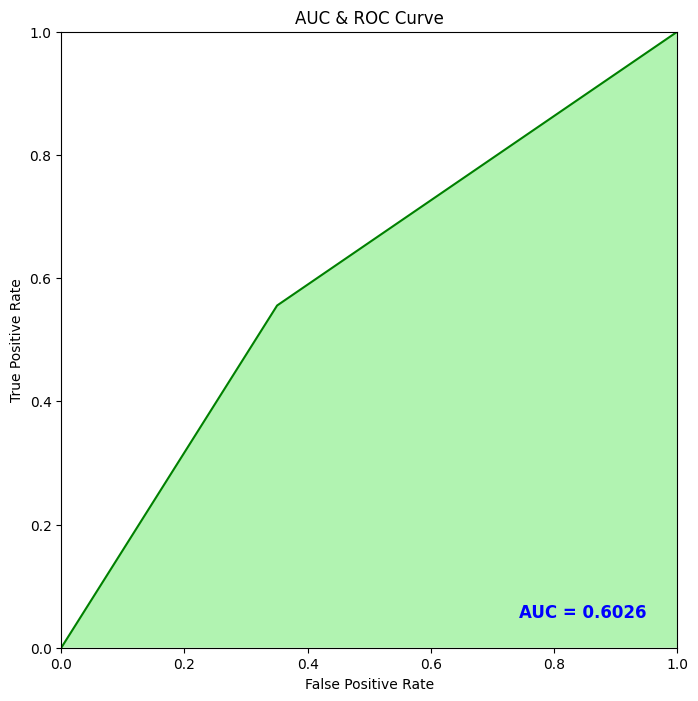

In [54]:
# AUC score
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, logistic_reg_pred)
auc
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, logistic_reg_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

**Using Decision Tree Classification algorithm, we got 64% accuracy with AUC value of 0.6026 which is considered satisfactory.**

The Logistic regression model performed satisfactory with AUC value less than 0.7


**Random Forest Classifier**

In [55]:
# Now using random Forest Model
#Fitting Decision Tree classifier to the training set
from sklearn.ensemble import RandomForestClassifier
forest_classifier= RandomForestClassifier(n_estimators= 110, criterion="entropy")
forest_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=110)

In [56]:
#Predicting the test set result
y_pred= forest_classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [57]:
# confusion metrics
cm= confusion_matrix(y_test, y_pred)
print("The confusion matrix is {}".format(cm))
### accuracy using accuracy_score
print("The accuracy of Model is {}".format(round(accuracy_score(y_test, y_pred), 2)))
print("The precision_score of Model is {}".format(round(precision_score(y_test, y_pred), 2)))
print("The recall of Model is {}".format(round(recall_score(y_test, y_pred), 2)))
print("The f1 of Model is {}".format(round(f1_score(y_test, y_pred), 2)))

The confusion matrix is [[272   2]
 [ 16  20]]
The accuracy of Model is 0.94
The precision_score of Model is 0.91
The recall of Model is 0.56
The f1 of Model is 0.69


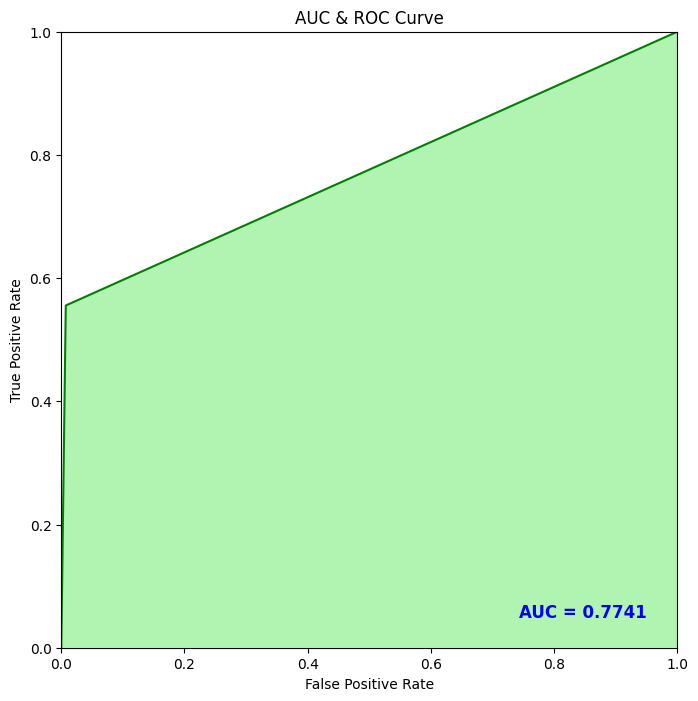

In [58]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred)
auc
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Using Random Forest Classification algorithm, we got 95% accuracy with AUC value of 0.7880 which is considered high performance and acceptable.

# **KNN Model**

In [59]:
# Now using KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn_classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=10, weights='distance',algorithm='kd_tree')
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', p=10, weights='distance')

In [60]:
y_pred= knn_classifier.predict(X_test)
y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [61]:
cm= confusion_matrix(y_test, y_pred)
print(cm)
### accuracy using accuracy_score
print("The accuracy of Model is {}".format(round(accuracy_score(y_test, y_pred), 2)))
print("The precision_score of Model is {}".format(round(precision_score(y_test, y_pred), 2)))
print("The recall of Model is {}".format(round(recall_score(y_test, y_pred), 2)))
print("The f1 of Model is {}".format(round(f1_score(y_test, y_pred), 2)))

[[268   6]
 [ 19  17]]
The accuracy of Model is 0.92
The precision_score of Model is 0.74
The recall of Model is 0.47
The f1 of Model is 0.58


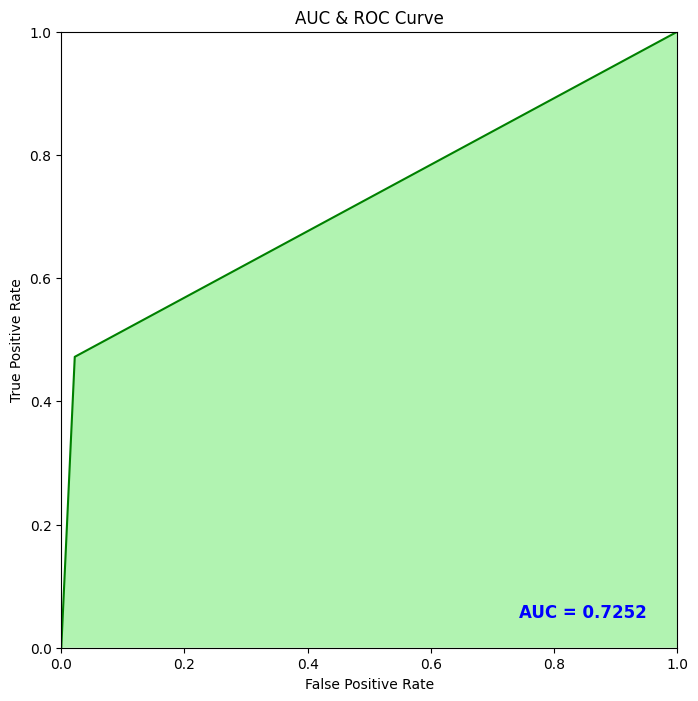

In [62]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred)
auc
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Using Random Forest Classification algorithm, we got 93% accuracy with AUC value of 0.7409 which is considered high performance and is acceptable.

# **xgboost model**

In [63]:
# Using xgboost model
from xgboost import XGBClassifier, plot_tree

import xgboost as xgb
from sklearn.metrics import mean_squared_error
plt.style.use('ggplot')

In [64]:
#We have to instantiate an XGBoost regressor object by calling the XGBRegressor() class from the XGBoost library with the hyper-parameters passed as arguments.
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
max_depth = 5, alpha = 10, n_estimators = 50,sampling_method='gradient_based')

In [65]:
# fit model to training data
model = XGBClassifier(alpha=0.20)
model.fit(X_train, y_train)

# train_predict = model.predict(X_train)
y_pred_xgb = model.predict(X_test)

print("The accuracy of Model is {}".format(round(accuracy_score(y_test, y_pred), 2)))

The accuracy of Model is 0.92


In [66]:
cm= confusion_matrix(y_test, y_pred_xgb)
cm

array([[266,   8],
       [ 17,  19]])

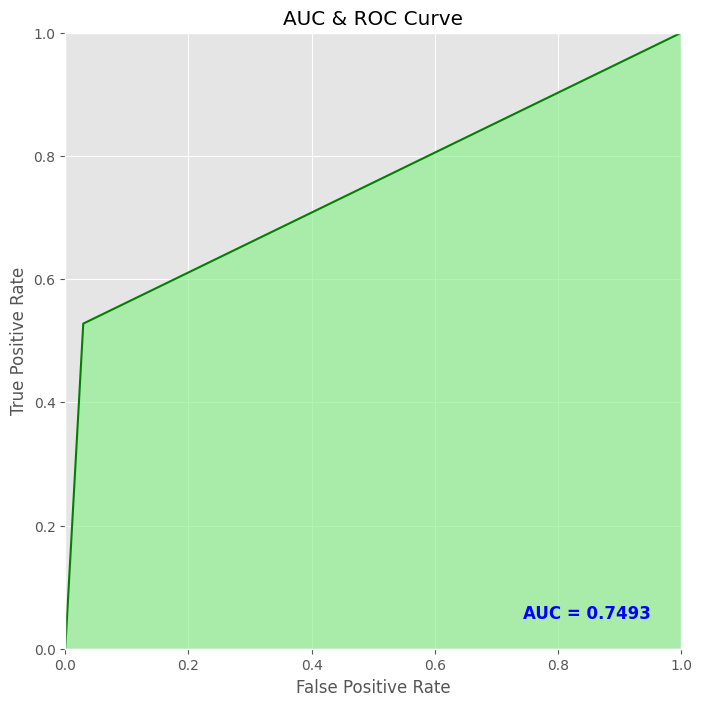

In [67]:
auc = metrics.roc_auc_score(y_test, y_pred_xgb)
auc
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_xgb)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

**Using XGBoost Classification algorithm, we got 93% accuracy with AUC value of 0.7705 which is considered high performance and acceptable.**

# **SVM Classifier**

In [68]:
#Importing SVM model
from sklearn import svm

#Creating a svm Classifier
clf = svm.SVC(kernel='poly',degree=2,gamma='auto',class_weight='balanced') # Linear Kernel was not working, taking infinite time to run
# indicating linear line does not exist for this dataset

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

The accuracy of Model is 0.72


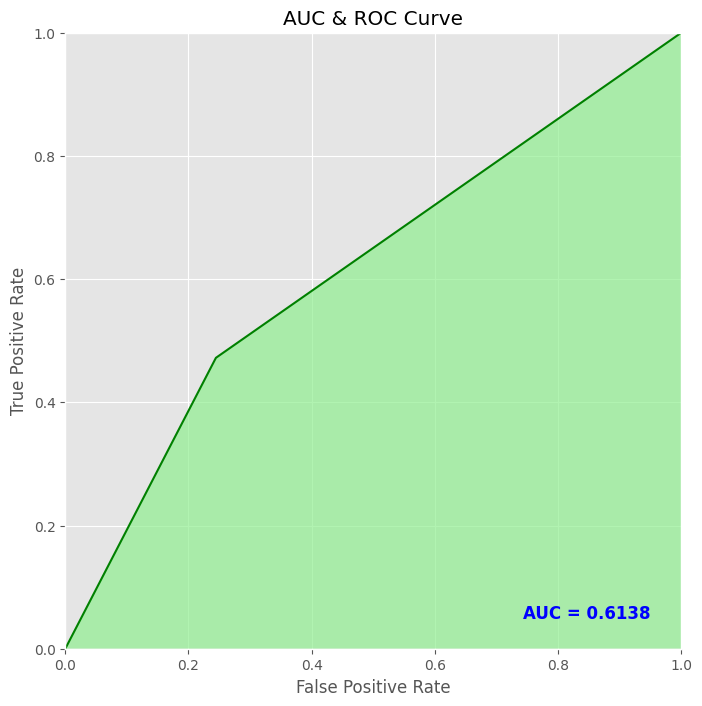

In [69]:
y_pred
print("The accuracy of Model is {}".format(round(accuracy_score(y_test, y_pred), 2)))
cm= confusion_matrix(y_test, y_pred)
cm
auc = metrics.roc_auc_score(y_test, y_pred)
auc
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

 **The performance of SVM classifier is poor as seen by its low accuracy and AUC value.**

**The hyper-parameter tuning is done for all the ML Models is done and best got results are shown .**

# **Conclusion:**

We have tried five different classification models for our credit card approval prediction task. The AUC value for **Decision Tree**  with **82%** , then followed by **random Forest** and  **xgBoost** is the most high , nearly at 75% . Moreover, the small difference in train and test accuracy scores indicates the absence of overfitting and underfitting in ML models.

**From the complete analysis and comparison of ML models on Dataset, it has been found that the Initial/Null Hypothesis about Random Forest Classifier outperforming other Models is wrong. It is because both the accuracy and AUC value of Decision Tree Model is more than Random Forest Classifier.
So, we reject our Null Hypothesis.
 Hence , it is recommended to use Decision Tree Classifier model for future Prediction.**

**As seen through the correlation coefficients, Gender is not playing a big impact on target variable. Apart from that not enough evidences found during the analysis. We do not find enough proof to discard the Null Hypothesis and consider our Hypothesis to be correct.**



# SQL Questions started



In [70]:
import duckdb
conn=duckdb.connect()

In [71]:
conn.register("cleaned_credit_card",cleaned_credit_card)

In [72]:

conn.execute("select * from cleaned_credit_card ").fetchdf()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.000000,365243,1,0,0,0,Missing,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,Missing,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586,1,1,1,0,Missing,2,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,Missing,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,Missing,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,166500.0,Commercial associate,Higher education,Married,House / apartment,-11957.000000,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.000000,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.000000,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.000000,-645,1,1,1,0,Drivers,2,0


In [73]:
# 1)Group the customers based on their income type and find the average of their annual income.
conn.execute("select AVG(Annual_income) from cleaned_credit_card GROUP BY Type_Income").fetchdf()

,avg(Annual_income)
0,151981.042751
1,178634.864662
2,202655.172414
3,214108.767123


In [74]:
# 2)Find the female owners of cars and property
conn.execute("select * from cleaned_credit_card where GENDER='F' and (Car_Owner='Y' or propert_Owner='Y')").fetchdf()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,Missing,2,1
1,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586,1,1,1,0,Missing,2,1
2,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,Missing,2,1
3,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,Missing,2,1
4,5009753,F,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,Missing,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,5067182,F,N,Y,0,112500.0,Working,Higher education,Married,House / apartment,-11432.000000,-820,1,1,0,0,Core staff,2,0
731,5115523,F,N,Y,3,112500.0,Working,Secondary / secondary special,Married,House / apartment,-13020.000000,-3693,1,0,0,0,Core staff,5,0
732,5149946,F,N,Y,0,180000.0,Working,Higher education,Married,House / apartment,-22228.000000,-686,1,1,1,0,High skill tech staff,2,0
733,5117065,F,N,Y,2,225000.0,Working,Higher education,Married,House / apartment,-16040.342071,-1648,1,1,1,0,Accountants,4,0


In [75]:
# 3)Find the male customers who are staying with their families.
conn.execute("select * from cleaned_credit_card where GENDER='M' and Family_Members>0").fetchdf()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,Missing,2,1
1,5010864,M,Y,Y,1,380250.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,1
2,5010868,M,Y,Y,1,380250.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,1
3,5010869,M,Y,Y,1,380250.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,1,1
4,5021303,M,N,N,1,380250.0,Pensioner,Higher education,Married,With parents,-8907.0,-913,1,0,0,1,Missing,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,5096856,M,Y,Y,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-17975.0,-3476,1,0,0,0,Drivers,2,0
564,5090942,M,N,N,0,225000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-13336.0,-1436,1,0,0,0,Low-skill Laborers,2,0
565,5118268,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,-11294.0,-3536,1,0,1,0,Drivers,3,0
566,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0


In [76]:
# 4)Please list the top five people having the highest income.
conn.execute("select * from cleaned_credit_card order by Annual_income desc limit 5").fetchdf()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5010864,M,Y,Y,1,380250.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,1
1,5010868,M,Y,Y,1,380250.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,1
2,5010869,M,Y,Y,1,380250.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,1,1
3,5021303,M,N,N,1,380250.0,Pensioner,Higher education,Married,With parents,-8907.0,-913,1,0,0,1,Missing,3,1
4,5024213,F,Y,Y,0,380250.0,Commercial associate,Higher education,Married,House / apartment,-15702.0,-185,1,0,1,0,Missing,2,1


In [77]:
# 5)How many married people are having bad credit?
# bad credit means label=1
conn.execute("select COUNT(*) as Unmarried_people_with_bad_credit from cleaned_credit_card where Marital_status='Married' and  label=1 ").fetchdf()

,Unmarried_people_with_bad_credit
0,114


In [78]:
#6)What is the highest education level and what is the total count?
conn.execute("select EDUCATION,COUNT(*) as total_people from cleaned_credit_card group by EDUCATION order by COUNT(*) DESC ").fetchdf()

,EDUCATION,total_people
0,Secondary / secondary special,1031
1,Higher education,426
2,Incomplete higher,68
3,Lower secondary,21
4,Academic degree,2


Highest Education level seems to be Higher Education from prior knowledge .

In [79]:
# 7)Between married males and females, who is having more bad credit?
conn.execute("select (select count(*) from cleaned_credit_card where GENDER='F' AND label=1)-(select count(*) from cleaned_credit_card where GENDER='M' AND label=1) as MaleCount_Minus_FemaleCount ").fetchdf()


,MaleCount_Minus_FemaleCount
0,25


Here it is clear that More Females have bad credit by 25 than their Male counterparts